In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("transactions_01160000_01169999.csv",sep=',')

In [3]:
data.head()

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input
0,0xba048f59c055470fed2668d2d040879ab5ef5dfc106c...,42,0xcb16bbb2b7b593f506369f0174355254485960fba2cd...,1160100,0,0xc5698e5ed169e2ff546455c0431543bc641fdb20,0x1699333a4e46093e15a94b4a213b88eb8a963834,111955450000000000,21000,50000000000,0x
1,0x0a1807644cef7ea7eca30c075512b1136c28b24ac538...,37665,0x62ee818f0b2b3047bd725317e820d83f0f5c5b9971b1...,1160101,0,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,1,300000,52000000000,0x3ed4867900000000000000000000000036c425e72bbc...
2,0x4d1ebaeddfdf5db17a83753003f6eaa50841b599ef15...,37666,0x62ee818f0b2b3047bd725317e820d83f0f5c5b9971b1...,1160101,1,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,1,300000,52000000000,0x3ed48679000000000000000000000000490c0dd13bfe...
3,0xac1baec5b7ce60fa5b7afcb1f362e41c5cb529384e69...,14,0x40fc1e112e67eb5ad1cef2517dcce281fd43d18349d9...,1160104,0,0x1431354497e6e11e24ec3fe9a76d4f7897e2a712,0x32be343b94f860124dc4fee278fdcbd38c102d88,9999370000000000000,21000,30000000000,0x
4,0xda255e01a213a47f3454e085681198f48b61ea947ab4...,138,0x40fc1e112e67eb5ad1cef2517dcce281fd43d18349d9...,1160104,1,0x4eb44a2d45370a8fe762040447112a6ce42ca6a2,0x32be343b94f860124dc4fee278fdcbd38c102d88,7023716000000000000,21000,30000000000,0x


In [4]:
print(len(data['from_address'].unique()))
print(len(data['to_address'].unique()))

6618
11960


In [5]:
data.dtypes

hash                 object
nonce                 int64
block_hash           object
block_number          int64
transaction_index     int64
from_address         object
to_address           object
value                object
gas                   int64
gas_price             int64
input                object
dtype: object

In [6]:
# On transforme les addresses en str pour éviter les ennuis

data[['from_address', 'to_address']] = data[['from_address', 'to_address']].astype(str)


In [7]:
# Vérifications

c = 0
for add in data['from_address'].values:
    if type(add) != str:
        c += 1
        
cdef parallel_outlier(graph,coeff_lambda):
    """
    Prend en arguments le graphe de transactions à étudier, et lambda permettant d'ajuster le seuil 
    Renvoie les outliers au sens des transactions parallèles 
    sous forme d'un DF pandas 
    
    """
    
    

SyntaxError: invalid syntax (<ipython-input-7-7998f53a6c7e>, line 8)

In [8]:
# Vérifications

c = 0
for add in data['to_address'].values:
    if type(add) != str:
        c += 1
        
c

0

In [9]:
full_addresses = np.append(data['from_address'].values,data['to_address'].values)
full_addresses

array(['0xc5698e5ed169e2ff546455c0431543bc641fdb20',
       '0xc400b9d93a23b0be5d41ab337ad605988aef8463',
       '0xc400b9d93a23b0be5d41ab337ad605988aef8463', ...,
       '0x32be343b94f860124dc4fee278fdcbd38c102d88',
       '0x32be343b94f860124dc4fee278fdcbd38c102d88',
       '0x32be343b94f860124dc4fee278fdcbd38c102d88'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Encoder.fit(full_addresses) #Apprend sur les addresses 

new_from = Encoder.transform(data['from_address']) # On transforme
new_to = Encoder.transform(data['to_address'])     # On transforme

In [11]:
data['from_address'] = new_from
data['to_address'] = new_to

In [12]:
# On transforme la colonne value en float
data[['value']] = data[['value']].astype(float)

In [13]:
# On utilise le tableau partiel avec les addresses et les montants transférés
data2 = data[['from_address','to_address','value']]

In [14]:
data2.head()

,from_address,to_address,value
0,9959,1235,1.119554e+17
1,9883,7823,1.000000e+00
2,9883,7823,1.000000e+00
3,1125,2638,9.999370e+18
4,4036,2638,7.023716e+18


In [15]:
# On somme les transactions entre meme personnes 
df = data2.groupby(['from_address','to_address']).sum()

In [16]:
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent>0)],'\n' )

In [17]:
Missing_values(data2)
Missing_values(df)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



In [18]:
# a rajouter, une colonne avec les balances en vertice property

In [19]:
df

value
from_address to_address              
0            1012        1.664428e+20
2            3959        5.000000e+18
3            2140        5.000000e+17
5            10359       1.100000e+18
7            2282        9.400000e+19
             3058        3.200000e+19
             3603        9.360000e+19
             3841        9.500000e+19
             5072        9.500000e+19
             8103        9.500000e+19
             10317       9.500000e+19
             12707       9.400000e+19
12           2638        2.241353e+19
13           8215        1.500000e+19
17           2978        5.000000e+17
25           5917        2.000000e+18
             11950       2.000000e+18
27           188         1.000000e+18
29           7549        3.000000e+18
31           5896        5.957200e+17
36           5893        4.010000e+18
37           1914        7.705119e+18
             6042        1.500000e+19
39           2638        8.933700e+18
41           2638        7.199370e+18
43           2638        3.404078e+19
48           2846        1.200000e+18
49           2638        1.046544e+18
50           1012        3.038620e+17
56           47          1.000000e+18
...                               ...
12817        2888        5.000000e+17
12818        2638        4.327499e+19
12819        6683        2.100000e+18
12820        12659       8.438417e+18
12821        2638        2.095443e+18
12824        2638        2.241018e+19
12827        5761        1.384273e+22
12828        2638        4.648744e+18
12829        9521        1.423900e+18
12831        2638        1.299370e+18
12833        2638        8.671404e+18
12836        2638        1.389370e+18
12838        7663        2.500000e+19
             8465        4.500000e+20
             12312       5.000000e+20
12839        2638        2.260614e+18
12841        5761        3.495000e+16
12842        2638        1.089943e+18
12844        2638        1.039370e+18
12848        1012        7.499958e+19
12849        2904        1.000000e+18
12852        3529        2.000000e+18
12853        11885       2.000000e+18
12854        6763        2.500000e+21
             7655        1.000000e+18
12856        2723        1.150000e+20
12857        7144        8.100000e+19
12858        2638        5.779994e+20
12859        2638        2.870797e+20
12860        1012        7.169777e+19

[18915 rows x 1 columns]

# Import sous GraphTool

In [20]:
from graph_tool.all import *

In [21]:
# Création du graphe vide
g = Graph(directed=True) 

# Ajout des arêtes suivant le np.array
vmap = g.add_edge_list(data2[['from_address','to_address']].values)

# Ajout des edge weights 
ew = g.new_edge_property("double")
ew.a = data2['value'].values
g.ep['edge_weight'] = ew

In [22]:
data2

,from_address,to_address,value
0,9959,1235,1.119554e+17
1,9883,7823,1.000000e+00
2,9883,7823,1.000000e+00
3,1125,2638,9.999370e+18
4,4036,2638,7.023716e+18
5,1183,2638,4.955182e+18
6,2638,2299,4.093302e+19
7,1196,2638,1.386536e+18
8,2638,2339,1.999422e+18
9,2727,2638,4.949370e+18


In [23]:
g.get_edges()[0]

array([    0,  1012, 32522], dtype=uint64)

In [24]:
data2[data2['from_address'] == 0 ]

,from_address,to_address,value
32522,0,1012,1.664428e+20


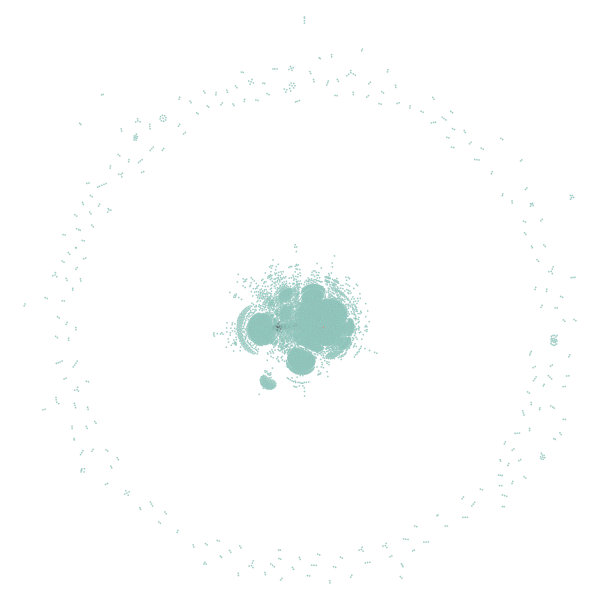

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f741c8f1208, at 0x7f741c8f17b8>

In [25]:
bv, be = betweenness(g)
be.a /= be.a.max() / 5
graph_draw(g, vertex_fill_color=bv, edge_pen_width=be)

In [26]:
be.a

PropertyArray([1.80585814e-04, 8.93864587e-10, 8.93864587e-10, ...,
               3.20575765e-04, 3.61210595e-04, 1.54827992e-04])

In [27]:
m = np.array(bv.a).mean() # Moyenne des centralités d'intermédiarité
print(m)

1.780524275420742e-05


In [28]:
sigma2 = (np.array(bv.a).std())**2 # variance des centralités d'intermédiarité
print(sigma2)

5.473912033781246e-07


In [ ]:
np.array(bv.a)[np.array(bv.a) > m + 3*sigma2] # 3*sigma a corriger

In [ ]:
np.sum(np.array(bv.a) > m + 3*sigma2)

In [ ]:
np.quantile(np.array(bv.a),3/4) # quantile 3/4

In [ ]:
np.quantile(np.array(bv.a),1/4) # quantile 1/4 

In [29]:
eiq = np.quantile(np.array(bv.a),3/4) - np.quantile(np.array(bv.a),1/4)

In [30]:
treshold  = np.quantile(np.array(bv.a),3/4) + 1.5*eiq

In [31]:
outliers = np.array(bv.a)[np.array(bv.a) > treshold]

In [36]:
[np.array(bv.a) > treshold]

[array([ True, False, False, ...,  True,  True, False])]

In [47]:
np.argwhere([np.array(bv.a) > treshold])[:,1]

array([    0,     7,    12, ..., 12858, 12859, 12860])

In [60]:
out_df = pd.DataFrame(np.argwhere([np.array(bv.a) > treshold])[:,1],columns=['addresses'])

In [65]:
Encoder.inverse_transform(out_df['addresses'])

array(['0x0000309bc0e82b9ac00244bbfb838d2e911cf4d5',
       '0x000a4e0c3fcfd7254a32f07d6b4e633e4f17c02d',
       '0x001217d58699efcceb05f785a969902d4172cfb6', ...,
       '0xfffa3d1a8fee91a6dea912a7aa5af9351e6d9b1d',
       '0xfffbca3a38c3c5fcb3adbb8e63c04c3e629aafce',
       '0xfffc4575b80a7f4687571c3cb3e76b096eee45b9'], dtype=object)

In [52]:
outliers

array([7.39755609e-06, 2.78948629e-04, 5.66828802e-08, ...,
       1.47951122e-05, 1.47951122e-05, 1.47951122e-05])

In [46]:
len(outliers)

2739

In [66]:
eiq = np.quantile(np.array(be.a),3/4) - np.quantile(np.array(be.a),1/4)

In [68]:
treshold  = np.quantile(np.array(be.a),3/4) + 1.5*eiq

In [69]:
outliers = np.array(be.a)[np.array(be.a) > treshold]

In [81]:
np.argwhere(np.array(be.a) > treshold)

array([[    3],
       [    4],
       [    6],
       ...,
       [54905],
       [54908],
       [54910]])

In [83]:
d_out_e = pd.DataFrame(np.argwhere(np.array(be.a) > treshold),columns=['graph_index'])

In [98]:
d_out_e

""
graph_index
3
4
6
7
8
10
11
12
14


In [89]:
d_out_e.set_index('graph_index',inplace=True)

In [87]:
df_edges = pd.DataFrame(g.get_edges(),columns=['from','to','index'])

In [94]:
df_edges.set_index('index',inplace=True)

In [95]:
df_edges

,from,to
index,,
32522,0,1012
11066,2,3959
4681,3,2140
4153,5,10359
4248,5,10359
36382,7,10317
37141,7,5072
37411,7,8103
37502,7,3841


In [107]:
df_edges_out = d_out_e.merge(df_edges,left_index=True,right_index=True)

In [108]:
df_edges_out

,from,to
3,1125,2638
4,4036,2638
6,2638,2299
7,1196,2638
8,2638,2339
10,2638,1771
11,1156,2638
12,2638,5298
14,2638,7345
15,2638,8944


In [116]:
df_edges_out['from_address'] = Encoder.inverse_transform(df_edges_out['from'])
df_edges_out['to_address'] = Encoder.inverse_transform(df_edges_out['to'])

In [117]:
df_edges_out

,from,to,from_address,to_address
3,1125,2638,0x1431354497e6e11e24ec3fe9a76d4f7897e2a712,0x32be343b94f860124dc4fee278fdcbd38c102d88
4,4036,2638,0x4eb44a2d45370a8fe762040447112a6ce42ca6a2,0x32be343b94f860124dc4fee278fdcbd38c102d88
6,2638,2299,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x2c406b0943f499abe66b4e6336f4294e1058685f
7,1196,2638,0x159b207b0211bc6da1f2c5c2a68f250933b69f4a,0x32be343b94f860124dc4fee278fdcbd38c102d88
8,2638,2339,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x2cff16c0303d0ee6400232666b6bdc61af1f2ba8
10,2638,1771,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x21a26e492a25fee7465cdcbf808d1518993cba3c
11,1156,2638,0x14cbe4fdf27bf3ef4a7b662a40af44b53f18903f,0x32be343b94f860124dc4fee278fdcbd38c102d88
12,2638,5298,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x6873fd6656d5d0e1fd898fd3b7456cb059df521b
14,2638,7345,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x909b9d9f7b5021987b344f198c6973738af11239
15,2638,8944,0x32be343b94f860124dc4fee278fdcbd38c102d88,0xb1630c9e7f865bf70d2f5c5aa9718c4969364795


In [56]:
data2[data2['from_address'] == 12860]

,from_address,to_address,value
50076,12860,1012,7.169777e+19


In [57]:
data2[data2['to_address'] == 12860]

,from_address,to_address,value
50045,2273,12860,7.169819e+19


In [ ]:
import matplotlib.pyplot as plt 
plt.boxplot(np.array(bv.a))
plt.show()

In [ ]:
plt.hist(bv.a)

In [124]:
ew.a # On récupère les poids 

PropertyArray([1.11955450e+17, 1.00000000e+00, 1.00000000e+00, ...,
               1.36093416e+18, 1.24358780e+18, 2.83827838e+18])

In [125]:
transactionsweights = ew.a

In [126]:
ewq34 = np.quantile(np.array(ew.a),3/4) # quantile 3/4

In [127]:
ewq14 = np.quantile(np.array(ew.a),1/4) # quantile 1/4

In [128]:
ewiq = ewq34 - ewq14

In [129]:
len(transactionsweights[transactionsweights > 1.5*ewiq])

11781

In [ ]:
plt.boxplot(np.array(transactionsweights))

In [130]:
transactionsweights[transactionsweights > 1.5*ewiq] 
# On va partir du principe que les adresses qui ont de gros volumes de transaction + une fréquence importante + 
# une centralité forte sont des outliers 

PropertyArray([9.99937000e+18, 7.02371600e+18, 4.95518193e+18, ...,
               5.75967840e+18, 4.12631593e+18, 5.09993187e+18])

In [132]:
len(transactionsweights > 1.5*ewiq)

54914

In [139]:
len(np.argwhere(transactionsweights > 1.5*ewiq))

11781

In [ ]:
m_ew, std = edge_average(g,ew) # average and std

In [ ]:
np.sum(np.array(ew.a) > m_ew + 3*std)

In [ ]:
plt.hist(np.array(ew.a))

In [ ]:
g.edges

In [ ]:
2833/54914

In [158]:
para = label_parallel_edges(g)

In [159]:
para.a

PropertyArray([ 0,  0,  1, ...,  8,  7, 18], dtype=int32)

In [162]:
nb_para = np.array(para.a)

In [163]:
q34 = np.quantile(nb_para,3/4) # quantile 3/4

In [164]:
q14 = np.quantile(nb_para,1/4) # quantile 3/4

In [167]:
tauiq = q34 - q14

In [205]:
nb_para[nb_para > q34 + 1.5*tauiq]

array([  13,   14,   13, ...,   18, 1315,   18], dtype=int32)

In [207]:
len(np.argwhere(nb_para[nb_para > q34 + 1.5*tauiq]))

8986

In [160]:
np.max(para.a)

PropertyArray(3097, dtype=int32)

In [ ]:
np.argmax([para.a == 3097])

In [ ]:
g.get_edges()

In [ ]:
df_edges = pd.DataFrame(g.get_edges(),columns=['from','to','index'])

In [ ]:
df_edges[df_edges['index'] == 54496]

In [ ]:
data2.loc[( data2['from_address'] == 5075 ) & ( data2['to_address'] == 1648 )]

In [ ]:
Encoder.inverse_transform(df_edges[df_edges['index'] == 5075]['from'])

In [ ]:
Encoder.inverse_transform(df_edges[df_edges['index'] == 1648]['to'])

In [ ]:
g.get_in_degrees([1648],eweight=ew) # nombre de degrés entrants

In [ ]:
g.get_edges().shape

In [ ]:
graph_draw(g)

In [146]:
g.list_properties()

edge_weight    (edge)    (type: double)


In [151]:
ew

<PropertyMap object with key type 'Edge' and value type 'double', for Graph 0x7f741c8f1208, at 0x7f741c8f1390>

In [150]:
g.ep['edge_weight']

<PropertyMap object with key type 'Edge' and value type 'double', for Graph 0x7f741c8f1208, at 0x7f741c8f1390>

In [ ]:
# Ici on a une matrice constituée de depart / arrivée / id
g.get_edges()

In [ ]:
# On compare au tableau des transactions

data2[data2['from_address'] == 12859]

In [ ]:
# On compare au tableau des transactions

data2[data2['from_address'] == 0]

In [ ]:
# On compare au tableau des transactions

data2[data2['from_address'] == 2]

## Fonctions

In [191]:
def transaction_outlier(graph,coeff_lambda=1.5):
    """
    Prend en arguments le graphe de transactions à étudier, et lambda permettant d'ajuster le seuil 
    Renvoie les outliers selon le montant des transactions/eweights associés au graphe 
    sous forme d'un DF pandas 
    
    """
    g = graph
    ew = g.ep['edge_weight']
    
    # On récupère les poids 
    tweights = np.array(ew.a)
    
    # Ecart interquartile
    twq34 = np.quantile(tweights,3/4) # quantile 3/4
    twq14 = np.quantile(tweights,1/4) # quantile 1/4
    tauiq = twq34 - twq14
    
    # Seuillage
    index = np.argwhere(tweights > coeff_lambda*tauiq) # Index des transactions outliers
    values = tweights[tweights > coeff_lambda*tauiq]   # Montant des transactions outliers 
    
    # Préparation du tableau
    
    d_out_e = pd.DataFrame(index,columns=['e_index']) # tableau des arêtes outliers
    df_edges = pd.DataFrame(g.get_edges(),columns=['from','to','index']) # tableau complet des arêtes    
    
    d_out_e.set_index('e_index',inplace=True) # changement des index pour un inner join
    df_edges.set_index('index',inplace=True) # changement des index pour un inner join    
    
    df_edges_out = d_out_e.merge(df_edges,left_index=True,right_index=True) # jointure interieure
    
    
    # On réencode les adresses
    df_edges_out['from_address'] = Encoder.inverse_transform(df_edges_out['from'])
    df_edges_out['to_address'] = Encoder.inverse_transform(df_edges_out['to'])
    df_edges_out['value'] = values
    return(df_edges_out)    

In [192]:
df_test = transaction_outlier(g)

In [193]:
df_test

,from,to,from_address,to_address,value
3,1125,2638,0x1431354497e6e11e24ec3fe9a76d4f7897e2a712,0x32be343b94f860124dc4fee278fdcbd38c102d88,9.999370e+18
4,4036,2638,0x4eb44a2d45370a8fe762040447112a6ce42ca6a2,0x32be343b94f860124dc4fee278fdcbd38c102d88,7.023716e+18
5,1183,2638,0x1543667b9bad3e41865c3233e1764d8dda8e1f3d,0x32be343b94f860124dc4fee278fdcbd38c102d88,4.955182e+18
6,2638,2299,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x2c406b0943f499abe66b4e6336f4294e1058685f,4.093302e+19
9,2727,2638,0x34420d02a652c40dfbb10d09c99c9a4e39e94477,0x32be343b94f860124dc4fee278fdcbd38c102d88,4.949370e+18
12,2638,5298,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x6873fd6656d5d0e1fd898fd3b7456cb059df521b,1.799990e+21
13,6641,2638,0x826607e5cd885df632068f1179ddf47fdd92bd2b,0x32be343b94f860124dc4fee278fdcbd38c102d88,4.976694e+18
14,2638,7345,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x909b9d9f7b5021987b344f198c6973738af11239,7.754446e+18
15,2638,8944,0x32be343b94f860124dc4fee278fdcbd38c102d88,0xb1630c9e7f865bf70d2f5c5aa9718c4969364795,3.996077e+18
20,3888,7778,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,0x99f815bd459685a429a7993df43bca8487f00717,4.950000e+18


In [145]:
data2[data2['from_address'] == 4036]

,from_address,to_address,value
4,4036,2638,7.023716e+18


In [194]:
def between_outlier(graph,coeff_lambda=1.5,nodes=True):
    """
    Prend en arguments le graphe de transactions à étudier, et lambda permettant d'ajuster le seuil 
    Renvoie les outliers au sens de la centralité d'intermédiarité 
    sous forme d'un DF pandas 
    
    """
    g = graph
    # On récupère les centralités d'intermédiarité de chaque noeuds (bv) et chaque arête (be)
    bv, be = betweenness(g)
    
    if nodes:
        q34 = np.quantile(np.array(bv.a),3/4)
        q14 = np.quantile(np.array(bv.a),1/4)
        
        # Ecart interquartile
        tauiq = q34 - q14
        
        # Seuillage
        treshold  = np.quantile(np.array(bv.a),3/4) + coeff_lambda*tauiq
        outliers = np.array(bv.a)[np.array(bv.a) > treshold]
        outliers_index = np.argwhere([np.array(bv.a) > treshold])[:,1]
        
        
        # On prépare le tableau 
        
        df = pd.DataFrame(outliers_index,columns=['v_index'])
        df['address'] = Encoder.inverse_transform(df['v_index'])
        
        return(df)
    
    else:

        q34 = np.quantile(np.array(be.a),3/4)
        q14 = np.quantile(np.array(be.a),1/4)
        
        # Ecart interquartile
        tauiq = q34 - q14
        
        # Seuillage
        treshold  = np.quantile(np.array(be.a),3/4) + coeff_lambda*tauiq
        outliers = np.array(be.a)[np.array(be.a) > treshold]
        outliers_index = np.argwhere(np.array(be.a) > treshold)
        
        
        # On prépare le tableau   
        d_out_e = pd.DataFrame(outliers_index,columns=['e_index']) # tableau des arêtes outliers
        df_edges = pd.DataFrame(g.get_edges(),columns=['from','to','index']) # tableau complet des arêtes
        
        d_out_e.set_index('e_index',inplace=True) # changement des indexs pour un inner join
        df_edges.set_index('index',inplace=True) # changement des indexs pour un inner join
        
        df_edges_out = d_out_e.merge(df_edges,left_index=True,right_index=True) # jointure interieure
        
        # On réencode les adresses
        df_edges_out['from_address'] = Encoder.inverse_transform(df_edges_out['from'])
        df_edges_out['to_address'] = Encoder.inverse_transform(df_edges_out['to'])
        
        return(df_edges_out)
    
    

In [195]:
df_test = between_outlier(g,nodes=False)

In [196]:
df_test

,from,to,from_address,to_address
3,1125,2638,0x1431354497e6e11e24ec3fe9a76d4f7897e2a712,0x32be343b94f860124dc4fee278fdcbd38c102d88
4,4036,2638,0x4eb44a2d45370a8fe762040447112a6ce42ca6a2,0x32be343b94f860124dc4fee278fdcbd38c102d88
6,2638,2299,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x2c406b0943f499abe66b4e6336f4294e1058685f
7,1196,2638,0x159b207b0211bc6da1f2c5c2a68f250933b69f4a,0x32be343b94f860124dc4fee278fdcbd38c102d88
8,2638,2339,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x2cff16c0303d0ee6400232666b6bdc61af1f2ba8
10,2638,1771,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x21a26e492a25fee7465cdcbf808d1518993cba3c
11,1156,2638,0x14cbe4fdf27bf3ef4a7b662a40af44b53f18903f,0x32be343b94f860124dc4fee278fdcbd38c102d88
12,2638,5298,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x6873fd6656d5d0e1fd898fd3b7456cb059df521b
14,2638,7345,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x909b9d9f7b5021987b344f198c6973738af11239
15,2638,8944,0x32be343b94f860124dc4fee278fdcbd38c102d88,0xb1630c9e7f865bf70d2f5c5aa9718c4969364795


In [201]:
def parallel_outlier(graph,coeff_lambda=1.5):
    """
    Prend en arguments le graphe de transactions à étudier, et lambda permettant d'ajuster le seuil 
    Renvoie les outliers au sens des transactions parallèles 
    sous forme d'un DF pandas 
    
    """
    g = graph
    para = label_parallel_edges(g)
    nb_para = np.array(para.a)
    
    # Ecart interquartile
    q34 = np.quantile(nb_para,3/4) # quantile 3/4
    q14 = np.quantile(nb_para,1/4) # quantile 1/4
    tauiq = q34 - q14
    
    # Seuillage
    treshold = q34 + coeff_lambda*tauiq
    outliers_index = np.argwhere(nb_para > treshold)
    outliers = nb_para[nb_para > treshold]
    
    
    
    # On prépare le tableau   
    d_out_e = pd.DataFrame(outliers_index,columns=['e_index']) # tableau des arêtes outliers
    df_edges = pd.DataFrame(g.get_edges(),columns=['from','to','index']) # tableau complet des arêtes
        
    d_out_e.set_index('e_index',inplace=True) # changement des indexs pour un inner join
    df_edges.set_index('index',inplace=True) # changement des indexs pour un inner join
        
    df_edges_out = d_out_e.merge(df_edges,left_index=True,right_index=True) # jointure interieure
        
    # On réencode les adresses
    df_edges_out['from_address'] = Encoder.inverse_transform(df_edges_out['from'])
    df_edges_out['to_address'] = Encoder.inverse_transform(df_edges_out['to'])
    df_edges_out['number_parallel_transactions'] = outliers
    
    return(df_edges_out)

In [202]:
parallel_outlier(g)

,from,to,from_address,to_address,number_parallel_transactions
101,9883,7823,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,13
107,9883,7823,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,14
121,5075,1648,0x63a9975ba31b0b9626b34300f7f627147df1f526,0x1f57f826caf594f7a837d9fc092456870a289365,13
123,5075,1648,0x63a9975ba31b0b9626b34300f7f627147df1f526,0x1f57f826caf594f7a837d9fc092456870a289365,14
124,5075,1648,0x63a9975ba31b0b9626b34300f7f627147df1f526,0x1f57f826caf594f7a837d9fc092456870a289365,15
125,5075,1648,0x63a9975ba31b0b9626b34300f7f627147df1f526,0x1f57f826caf594f7a837d9fc092456870a289365,16
126,5075,1648,0x63a9975ba31b0b9626b34300f7f627147df1f526,0x1f57f826caf594f7a837d9fc092456870a289365,17
167,9883,7823,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,15
173,9883,7823,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,16
182,9883,7823,0xc400b9d93a23b0be5d41ab337ad605988aef8463,0x9af09991ad63814e53ffc1bccf213ee74027608b,17


# Création de fonctions d'import 

In [ ]:
import glob

def aggregate_csv():
    """
    Concatene les csv présents dans le répertoire courant, 
    Renvoie un pandas DF résultant de la concaténation
    
    """
    extension = 'csv'
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
    return(combined_csv)

In [ ]:
full_data = aggregate_csv()

In [ ]:
full_data.head()

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder




def format_as_tgraph(data):
    """
    Formatage d'un pandas DF en un pandas DF adapté
    à un import en graphe de transactions: 
    
    Renvoie un pandas DF dans un format adapté a un import graphique
    
    """
    
    # On transforme les addresses en str pour éviter les ennuis
    data[['from_address', 'to_address']] = data[['from_address', 'to_address']].astype(str)

    
    # On concatene les addresses pour éviter les doublons 
    
    full_addresses = np.append(data['from_address'].values,data['to_address'].values)
    
    
    # Encodage des addresses sur la liste ENTIERE des addresses 
    Encoder = LabelEncoder()
    Encoder.fit(full_addresses) #Apprend sur les addresses 

    new_from = Encoder.transform(data['from_address']) # On transforme
    new_to = Encoder.transform(data['to_address'])     # On transforme
    
    
    # Remplacement des colonnes par les colonnes ainsi encodées
    data['from_address'] = new_from
    data['to_address'] = new_to
    
    # On transforme la colonne value en float
    data[['value']] = data[['value']].astype(float)
    
    
    return(data)

In [ ]:
full_data_graph = format_as_tgraph(full_data)

In [ ]:
full_data_graph.head()

In [ ]:
from graph_tool.all import *


def create_graph_obj(data):
    """
    Prend un pandas DF formaté correctement en transaction graph
    Crée et renvoie un objet graph-tool sur lequel on peut travailler
    
    """
    
    # Création du graphe vide
    g = Graph(directed=True) 

    # Ajout des arêtes suivant le np.array
    vmap = g.add_edge_list(data[['from_address','to_address']].values)

    # Ajout des edge weights 
    ew = g.new_edge_property("double")
    ew.a = data['value'].values
    g.ep['edge_weight'] = ew
    
    return(g)



In [ ]:
g = create_graph_obj(full_data_graph)

In [ ]:
graph_draw(g)

In [ ]:
weights = g.edge_properties['edge_weight']

In [ ]:
pos = sfdp_layout(g,eweight=weights)
graph_draw(g,pos=pos)

In [ ]:
adj_m = adjacency(g)

In [ ]:
degs = adj_m.sum(axis=0)

In [ ]:
v_number = np.max(g.get_vertices())

In [ ]:
deg_moy = np.sum(degs)/v_number

In [ ]:
deg_moy

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
g.get_vertices()

In [ ]:
g.get_edges()

In [ ]:
np.unique(np.append(full_data_graph['from_address'].values,full_data_graph['to_address'].values))

In [ ]:
len(vertex_hist(g, deg='in', bins=[0, 1], float_count=True)[0])

In [ ]:
plt.hist(vertex_hist(g, deg='in', bins=[0, 1], float_count=True)[0])

In [ ]:
plt.hist(vertex_hist(g, deg='out', bins=[0, 1], float_count=True)[0])

In [ ]:
edge_average(g,g.ep['edge_weight'])

In [ ]:
vertex_hist(g,'in',bins=[0,1])